# Using APIs via Python

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb) 

From now on, we'll use these interactive Jupyter notebooks so you can get a hands-on experience with the APIs. This Jupyter notebooks are interactive files that intermix code and content. You can click the button above to open this notebook in Google Colab, which is a free Jupyter notebook environment that runs in the cloud. You can also download these files if you have Jupyter installed in your computer and run them locally.

These notebooks are the equivalent to R notebooks in the Python world. For a quick overview of Python basics, some good resources include:

- [https://www.learnpython.org/](https://www.learnpython.org/)
- [https://www.w3schools.com/python/](https://www.w3schools.com/python/)
- [https://learnxinyminutes.com/docs/python/](https://learnxinyminutes.com/docs/python/)

If you are not just viewing this notebook, e.g., if you opened it in colab using the button above, notebooks cells can be run by putting your mouse cursor inside one of the cells and pressing `Shift + Enter`. You can also run cells by clicking the `Run` button if there is a toolbar above.

Start by running the cell below that sets up the environment for the rest of the notebook.

In [80]:
!pip install --upgrade pip -q
!pip install requests pandas -q
import requests
import pandas as pd

## Initial Exploration of the PubMed API

We'll now make the same request as before, but using the `requests` library with Python.

In [81]:
response = requests.get(  # GET request
    url="https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi",  # URL of the API
    params={  # Parameters of the request
        "db": "pubmed",
        "term": "diagnostic",
        "format": "json"
    }
).json()  # Parse the response as JSON
response

{'header': {'type': 'esearch', 'version': '0.3'},
 'esearchresult': {'count': '11797794',
  'retmax': '20',
  'retstart': '0',
  'idlist': ['38577845',
   '38577820',
   '38577811',
   '38577809',
   '38577804',
   '38577794',
   '38577791',
   '38577788',
   '38577784',
   '38577783',
   '38577761',
   '38577756',
   '38577746',
   '38577740',
   '38577738',
   '38577726',
   '38577722',
   '38577717',
   '38577713',
   '38577711'],
  'translationset': [{'from': 'diagnostic',
    'to': '"diagnosis"[MeSH Terms] OR "diagnosis"[All Fields] OR "diagnostic"[All Fields] OR "diagnostical"[All Fields] OR "diagnostically"[All Fields] OR "diagnostics"[All Fields]'}],
  'querytranslation': '"diagnosis"[MeSH Terms] OR "diagnosis"[All Fields] OR "diagnostic"[All Fields] OR "diagnostical"[All Fields] OR "diagnostically"[All Fields] OR "diagnostics"[All Fields]'}}

The only difference now is that we can directly manipulate the data that we got from the API. For example, we can extract from these results the number of articles that match our search term.

In [82]:
response["esearchresult"]["count"]

'11797794'

We can also extract the list of PMIDs that match our search term. 

In [83]:
response["esearchresult"]["idlist"]

['38577845',
 '38577820',
 '38577811',
 '38577809',
 '38577804',
 '38577794',
 '38577791',
 '38577788',
 '38577784',
 '38577783',
 '38577761',
 '38577756',
 '38577746',
 '38577740',
 '38577738',
 '38577726',
 '38577722',
 '38577717',
 '38577713',
 '38577711']

Note that we only get the first 20 PMIDs, as this is the default behavior of the API. We can change this by adding the `retmax` parameter to the request.

In [84]:
response = requests.get(  # GET request
    url="https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi",  # URL of the API
    params={  # Parameters of the request
        "db": "pubmed",
        "term": "diagnostic",
        "format": "json",
        "retmax": 100,  # <- We've changed the default value of 20 to 100
    }
).json()  # Parse the response as JSON
response["esearchresult"]["idlist"]

['38577845',
 '38577820',
 '38577811',
 '38577809',
 '38577804',
 '38577794',
 '38577791',
 '38577788',
 '38577784',
 '38577783',
 '38577761',
 '38577756',
 '38577746',
 '38577740',
 '38577738',
 '38577726',
 '38577722',
 '38577717',
 '38577713',
 '38577711',
 '38577700',
 '38577697',
 '38577695',
 '38577694',
 '38577693',
 '38577664',
 '38577653',
 '38577649',
 '38577648',
 '38577646',
 '38577645',
 '38577643',
 '38577638',
 '38577637',
 '38577636',
 '38577616',
 '38577603',
 '38577595',
 '38577594',
 '38577593',
 '38577592',
 '38577590',
 '38577588',
 '38577572',
 '38577570',
 '38577565',
 '38577559',
 '38577558',
 '38577555',
 '38577550',
 '38577549',
 '38577539',
 '38577534',
 '38577533',
 '38577530',
 '38577529',
 '38577528',
 '38577525',
 '38577522',
 '38577516',
 '38577506',
 '38577479',
 '38577475',
 '38577468',
 '38577465',
 '38577464',
 '38577463',
 '38577461',
 '38577457',
 '38577452',
 '38577451',
 '38577449',
 '38577446',
 '38577444',
 '38577440',
 '38577438',
 '38577429',

## Initial Exploration of the ClinicalTrials.gov API

We can also use the same code snippet to explore the ClinicalTrials.gov API. Let's start by searching for clinical trials that contain the term "heart attack".

In [85]:
response = requests.get(  # GET request
    url="https://classic.clinicaltrials.gov/api/query/full_studies",  # URL of the API
    params={  # Parameters of the request
        "expr": "heart+attack",
        "min_rnk": 1,
        "max_rnk": 20,
        "fmt": "json",
    }
).json()  # Parse the response as JSON
response

{'FullStudiesResponse': {'APIVrs': '1.01.05',
  'DataVrs': '2024:04:03 23:23:31.327',
  'Expression': 'heart+attack',
  'NStudiesAvail': 489715,
  'NStudiesFound': 2108,
  'MinRank': 1,
  'MaxRank': 20,
  'NStudiesReturned': 20,
  'FullStudies': [{'Rank': 1,
    'Study': {'ProtocolSection': {'IdentificationModule': {'NCTId': 'NCT00929994',
       'OrgStudyIdInfo': {'OrgStudyId': 'Brooks - 001'},
       'Organization': {'OrgFullName': 'Toronto Rehabilitation Institute',
        'OrgClass': 'OTHER'},
       'BriefTitle': 'Effects of Cardiac Rehabilitation for Individuals With Transient Ischemic Attack',
       'OfficialTitle': 'Effects of Cardiac Rehabilitation for Individuals With Transient Ischemic Attack'},
      'StatusModule': {'StatusVerifiedDate': 'April 2019',
       'OverallStatus': 'Completed',
       'ExpandedAccessInfo': {'HasExpandedAccess': 'No'},
       'StartDateStruct': {'StartDate': 'March 2010'},
       'PrimaryCompletionDateStruct': {'PrimaryCompletionDate': 'November

There are many more fields in this response, but we can extract the number of studies that match our search term, and the titles and IDs of the first 20 studies.

In [86]:
response["FullStudiesResponse"]["NStudiesFound"]

2108

In [87]:
for study in response["FullStudiesResponse"]["FullStudies"]:
    print(study["Study"]["ProtocolSection"]["IdentificationModule"]["NCTId"],
          study["Study"]["ProtocolSection"]["IdentificationModule"]["OfficialTitle"])

NCT00929994 Effects of Cardiac Rehabilitation for Individuals With Transient Ischemic Attack
NCT00536562 Comprehensive Cardiac Rehabilitation Programming For Patients Following Transient Ischemic Attack
NCT05230069 Assessment of a Prehospital Mobile App and Sensor Triage System to Detect Neurologic and Cardiac Emergencies: The ECHAS Assessment Study (ECHAS- One)
NCT05090618 Preventive and Personalized Medicine (2021-2023)
NCT00102128 Evaluation of Skeletal Myoblast Transplant for Treating Ischemic Heart Failure
NCT05843006 SWEAT Analysis for Predicting Patient Outcome After HEART Attack
NCT00067236 A Multicenter, Randomized, Double-blind, Placebo-controlled Study of Oral PG-116800 Following a Heart Attack
NCT01911910 Heart Attack Prevention Programme for You (HAPPY) London
NCT01936675 Myocardial Infarction Genes (MI-GENES) Study - Using Genomic Data to Refine Risk Assessment for Heart Attack
NCT05781087 Optical Coherence Tomography With Magnetic Resonance Angiography to Assess STEMI No

Because we have all the data in a structured format, we can easily manipulate it. For example, we can extract the list of conditions that are being studied in these trials.

In [88]:
for study in response["FullStudiesResponse"]["FullStudies"]:
    print(study["Study"]["ProtocolSection"]["ConditionsModule"]["ConditionList"]["Condition"])

['Transient Ischemic Attack']
['TIA (Transient Ischemic Attack)']
['Heart Attack and Stroke']
['Heart Attack']
['Ischemic Heart Failure', 'Ischemic Heart Disease', 'Ischemic Cardiomyopathy']
['Acute Myocardial Infarction']
['Myocardial Infarction', 'Heart Failure', 'Heart Enlargement']
['Cardiovascular Disease']
['Coronary Artery Disease', 'Myocardial Infarction', 'Genomic Risk Communication']
['Coronary Artery Disease', 'ST Elevation Myocardial Infarction', 'Ischemic Heart Disease']
['Heart Disease', 'Heart Attacks']
['Coronary Artery Disease', 'Cerebral Stroke', 'TIA (Transient Ischemic Attack)']
['Acute Myocardial Infarction']
['Myocardial Infarction']
['Ischemic Stroke', 'Transient Ischemic Attack']
['Heart Failure', 'Myocardial Infarction']
['Heart Attack', 'Enlarged Heart']
['Acute Myocardial Infarction']
['Cardiovascular Diseases', 'Coronary Disease', 'Heart Diseases', 'Myocardial Infarction', 'Myocardial Ischemia']
['Myocardial Infarction']


We can even start to make some simple analyses. For example, we can count the number of studies that are being conducted in each country.

In [89]:
from collections import Counter

# Stores the number of studies per country
countries = Counter()

# Iterates over the studies
for study in response["FullStudiesResponse"]["FullStudies"]:
    locations = study["Study"]["ProtocolSection"]["ContactsLocationsModule"]
    if "LocationList" in locations:  # Some studies don't have location information
        location = study["Study"]["ProtocolSection"]["ContactsLocationsModule"]["LocationList"]["Location"]
        for loc in location:  # Some studies have multiple locations
            if "LocationCountry" in loc:  # Some locations don't have country information
                countries.update([loc["LocationCountry"]])  # Increments the count of studies in this country

df_countries = pd.DataFrame.from_records(countries.most_common(), columns=["Country", "Count"])
df_countries

,Country,Count
0,United States,137
1,Canada,26
2,France,13
3,Poland,12
4,United Kingdom,7
5,Italy,5
6,Belgium,4
7,Germany,3
8,Taiwan,2
9,Kazakhstan,1


We can even plot this data to make it easier to understand.

<Axes: xlabel='Country'>

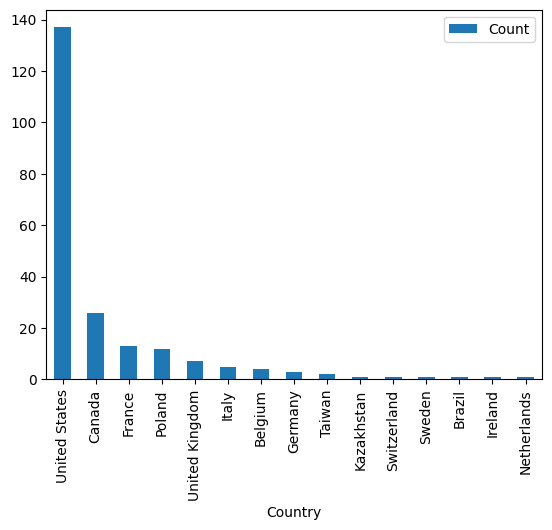

In [90]:
df_countries.plot(x="Country", y="Count", kind="bar")

## Summary

In this notebook, we've learned the basics for how to interact with APIs in Python and perform some basic analysis. In the next chapter, we'll build on these concepts to show some real use-cases for these APIs.

---
[top](https://github.com/hscells/apis-for-evidence-identification)<br/>
[next: Searching PubMed](https://github.com/hscells/apis-for-evidence-identification/blob/main/3-use-cases/3-1-searching-pubmed.ipynb)<br/>
[previous: Using APIs via HTTPie](https://github.com/hscells/apis-for-evidence-identification/blob/main/2-how/2-3-using-apis-via-httpie.md)<br/>